In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager, add_image
from highlight_text import fig_text

In [2]:
df_player1=pd.read_html('https://fbref.com/en/players/49296448/Joshua-Kimmich')[0]
df_player1=df_player1.dropna() 
df_player1.reset_index(drop=True,inplace=True)
df_player1

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.19,91.0
1,npxG,0.13,89.0
2,Shots Total,1.47,83.0
3,Assists,0.40,99.0
4,xA,0.26,98.0
5,npxG+xA,0.39,97.0
6,Shot-Creating Actions,4.64,98.0
7,Passes Attempted,84.80,97.0
8,Pass Completion %,83.4%,45.0
9,Progressive Passes,9.17,99.0


In [3]:
df_player2=pd.read_html('https://fbref.com/en/players/cc86b9a3/Leon-Goretzka')[0]
df_player2=df_player2.dropna() 
df_player2.reset_index(drop=True,inplace=True)
df_player2

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.23,95.0
1,npxG,0.20,96.0
2,Shots Total,2.46,98.0
3,Assists,0.27,96.0
4,xA,0.16,92.0
5,npxG+xA,0.36,95.0
6,Shot-Creating Actions,2.86,87.0
7,Passes Attempted,57.16,66.0
8,Pass Completion %,86.9%,74.0
9,Progressive Passes,5.63,83.0


In [4]:
# parameter list
params = [
    "Non-Penalty Goals", "npxG", "Assists","xA","Shots Total","Shot-Creating Actions",
    "Interceptions","Clearances","Aerials won",
    "Passes Attempted","Pass Completion %","Progressive Passes","Progressive Carries","Dribbles Completed","Touches (Att Pen)"
]

values_player1=[]
values_player2=[]
for i in range(15):
    for j in range(20):
      if(params[i]==df_player1['Statistic'][j]):
        values_player1.append(df_player1['Percentile'][j])
        values_player2.append(df_player2['Percentile'][j])
print(values_player1)
print(values_player2)

[91.0, 89.0, 99.0, 98.0, 83.0, 98.0, 80.0, 33.0, 28.0, 97.0, 45.0, 99.0, 93.0, 47.0, 65.0]
[95.0, 96.0, 96.0, 92.0, 98.0, 87.0, 95.0, 30.0, 88.0, 66.0, 74.0, 83.0, 79.0, 21.0, 93.0]


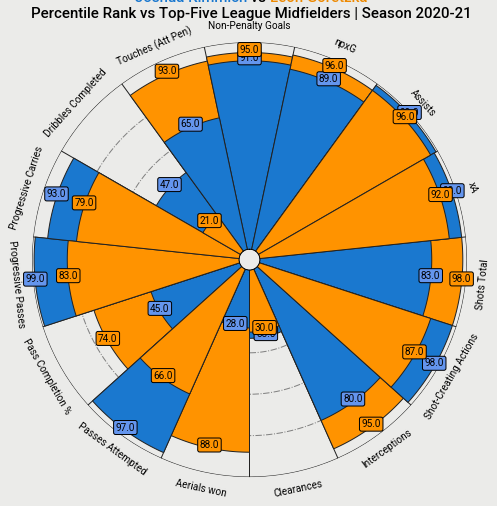

In [5]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values_player1,                     # list of values
    compare_values=values_player2,    # comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.515, 0.97, "<Joshua Kimmich> vs <Leon Goretzka>", size=15, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#EE8900'}],
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.922,
    "Percentile Rank vs Top-Five League Midfielders | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

plt.show()
fig.savefig('outputs/KimmichvsGoretzkaPercentilePizzaComparison.png', dpi=200, facecolor=fig.get_facecolor(), edgecolor='None', transparent=True)